In the Application Data Set, we have attributes such as IncomeTotal,AMTAPPLICATION,AMT CREDIT, and approximately 122 Columns. The interesting thing is that if you want to see patterns and variations, we find out the SK_ID_CURR of creditcard fraud detection not SK_ID_CURR creditcard fraud detection.

**Importing the necessary libraries**

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [2]:
from sklearn.metrics import auc

**Load the DataSet**

In [3]:
df=pd.read_csv('data/application_data.csv')

**EDA**

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(307511, 122)

In [6]:
df.size

37516342

In [7]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
df.drop(["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","OWN_CAR_AGE","FLAG_MOBIL",
         "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","FLAG_EMAIL","CNT_FAM_MEMBERS","REGION_RATING_CLIENT",
         "REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","NAME_TYPE_SUITE",
         "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],axis=1,inplace=True)

In [9]:
df.drop(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [10]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
307506,456251,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Sales staff,THURSDAY,...,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898
307507,456252,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,NaN,MONDAY,...,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,0.0214
307508,456253,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Managers,THURSDAY,...,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,0.7970
307509,456254,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Laborers,WEDNESDAY,...,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,0.0086
307510,456255,0,Cash loans,157500.0,675000.0,49117.5,675000.0,Commercial associate,Laborers,THURSDAY,...,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0805,NaN,0.0000,0.0718


In [11]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BE

In [12]:
df.drop(['SK_ID_CURR','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG','NAME_CONTRACT_TYPE',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE','WEEKDAY_APPR_PROCESS_START',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI','OCCUPATION_TYPE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'],axis=1,inplace=True)

In [13]:
df.columns

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [14]:
df.shape

(307511, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TARGET                   307511 non-null  int64  
 1   AMT_INCOME_TOTAL         307511 non-null  float64
 2   AMT_CREDIT               307511 non-null  float64
 3   AMT_ANNUITY              307499 non-null  float64
 4   AMT_GOODS_PRICE          307233 non-null  float64
 5   NAME_INCOME_TYPE         307511 non-null  object 
 6   HOUR_APPR_PROCESS_START  307511 non-null  int64  
 7   ORGANIZATION_TYPE        307511 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 18.8+ MB


In [16]:
df.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000
mean,0.080729,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,12.063419
std,0.272419,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,3.265832
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,10.000000
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,12.000000
75%,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,14.000000
max,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,23.000000


**Missing Numbes**

In [17]:
def missing (df1):
    missing_number = df1.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

**Fill Null values with Mean, median and Mode**

In [18]:
df.isnull().sum()

TARGET                       0
AMT_INCOME_TOTAL             0
AMT_CREDIT                   0
AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_INCOME_TYPE             0
HOUR_APPR_PROCESS_START      0
ORGANIZATION_TYPE            0
dtype: int64

In [19]:
#fill null values with mean,median ,mode
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

        TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0            1          202500.0    406597.5      24700.5         351000.0   
1            0          270000.0   1293502.5      35698.5        1129500.0   
2            0           67500.0    135000.0       6750.0         135000.0   
3            0          135000.0    312682.5      29686.5         297000.0   
4            0          121500.0    513000.0      21865.5         513000.0   
...        ...               ...         ...          ...              ...   
307506       0          157500.0    254700.0      27558.0         225000.0   
307507       0           72000.0    269550.0      12001.5         225000.0   
307508       0          153000.0    677664.0      29979.0         585000.0   
307509       1          171000.0    370107.0      20205.0         319500.0   
307510       0          157500.0    675000.0      49117.5         675000.0   

            NAME_INCOME_TYPE  HOUR_APPR_PROCESS_START       ORG

In [20]:
df.isnull().sum()

TARGET                     0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY                0
AMT_GOODS_PRICE            0
NAME_INCOME_TYPE           0
HOUR_APPR_PROCESS_START    0
ORGANIZATION_TYPE          0
dtype: int64

In [21]:
df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,Working,10,Business Entity Type 3
1,0,270000.0,1293502.5,35698.5,1129500.0,State servant,11,School
2,0,67500.0,135000.0,6750.0,135000.0,Working,9,Government
3,0,135000.0,312682.5,29686.5,297000.0,Working,17,Business Entity Type 3
4,0,121500.0,513000.0,21865.5,513000.0,Working,11,Religion


**Split the Numeric and Catagorical Data**

In [22]:
# finding numerical data and categorical data in dataset
numerical= df.drop(['TARGET'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')


Categorical Columns: Index(['NAME_INCOME_TYPE', 'ORGANIZATION_TYPE'], dtype='object')


**Count Plot**

**Apply the Label Encoding**

Label encoding is the process of transforming labels into a numeric form so that they may be read by machines. The operation of those labels can then be better determined by machine learning techniques. It is a significant supervised learning pre-processing step for the structured dataset.

In [23]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['NAME_INCOME_TYPE']= label_encoder.fit_transform(df['NAME_INCOME_TYPE'])

df['NAME_INCOME_TYPE']

0         7
1         4
2         7
3         7
4         7
         ..
307506    7
307507    3
307508    7
307509    1
307510    1
Name: NAME_INCOME_TYPE, Length: 307511, dtype: int32

In [24]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['ORGANIZATION_TYPE']= label_encoder.fit_transform(df['ORGANIZATION_TYPE'])

df['ORGANIZATION_TYPE']

0          5
1         39
2         11
3          5
4         37
          ..
307506    43
307507    57
307508    39
307509     3
307510     5
Name: ORGANIZATION_TYPE, Length: 307511, dtype: int32

**Find out Statistical values**

In [25]:
for col in df.columns:
    if df[col].dtypes != object:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        llp = q1-1.5*IQR
        ulp = q3+1.5*IQR
        print('column name',col)
        print('mean:',df[col].mean())
        print('mode:',df[col].mode()[0])
        print('median:',df[col].median())
        print('skewness:',df[col].skew())
        print('kurtosis:',df[col].kurtosis())
        print('null_value count:',df[col].isnull().sum())
        print('\n')

column name TARGET
mean: 0.08072881945686496
mode: 0
median: 0.0
skewness: 3.0781586659196685
kurtosis: 7.475109389392569
null_value count: 0


column name AMT_INCOME_TOTAL
mean: 168797.9192969845
mode: 135000.0
median: 147150.0
skewness: 391.5596541041876
kurtosis: 191786.55438080415
null_value count: 0


column name AMT_CREDIT
mean: 599025.9997057016
mode: 450000.0
median: 513531.0
skewness: 1.2347784971349398
kurtosis: 1.9340413008324937
null_value count: 0


column name AMT_ANNUITY
mean: 27108.48784108536
mode: 9000.0
median: 24903.0
skewness: 1.5798237246955467
kurtosis: 7.7077559537369025
null_value count: 0


column name AMT_GOODS_PRICE
mean: 538316.2943667056
mode: 450000.0
median: 450000.0
skewness: 1.350142549635089
kurtosis: 2.4374401731304225
null_value count: 0


column name NAME_INCOME_TYPE
mean: 4.670288217332063
mode: 7
median: 7.0
skewness: -0.3550757581538051
kurtosis: -1.5948494738474766
null_value count: 0


column name HOUR_APPR_PROCESS_START
mean: 12.0634188695688

**Outliers**

A data point that is an outlier in a data graph or dataset you are dealing with is one that is extraordinarily high or extraordinarily low in comparison to the nearest data point and the rest of the nearby coexisting values. Outliers in a dataset or graph are extreme values that stand out significantly from the main pattern of values.

In [26]:
def out_to_null(data=df):
    for x in df.columns:
        if df[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

**PairPlot**

In [27]:
#count=1
#plt.subplots(figsize=(30,25))
#for i in df.columns:
#    if df[i].dtypes!='object':
#        plt.subplot(6,7,count)
#        sns.distplot(df[i])
#        count+=1
#
#plt.show()

**Correlation**

Correlation is the relationship between target variable and feature variables.

In [28]:
cor = df.corr()
cor

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
TARGET,1.000000,-0.003982,-0.030369,-0.012815,-0.039623,0.046829,-0.024166,-0.030765
AMT_INCOME_TOTAL,-0.003982,1.000000,0.156870,0.191657,0.159632,-0.044451,0.036459,-0.058272
AMT_CREDIT,-0.030369,0.156870,1.000000,0.770127,0.986734,-0.071794,0.052738,-0.052620
AMT_ANNUITY,-0.012815,0.191657,0.770127,1.000000,0.774837,-0.073018,0.052265,-0.077215
AMT_GOODS_PRICE,-0.039623,0.159632,0.986734,0.774837,1.000000,-0.072458,0.062269,-0.052060
NAME_INCOME_TYPE,0.046829,-0.044451,-0.071794,-0.073018,-0.072458,1.000000,-0.029674,-0.176226
HOUR_APPR_PROCESS_START,-0.024166,0.036459,0.052738,0.052265,0.062269,-0.029674,1.000000,-0.083595
ORGANIZATION_TYPE,-0.030765,-0.058272,-0.052620,-0.077215,-0.052060,-0.176226,-0.083595,1.000000


**HeatMap**

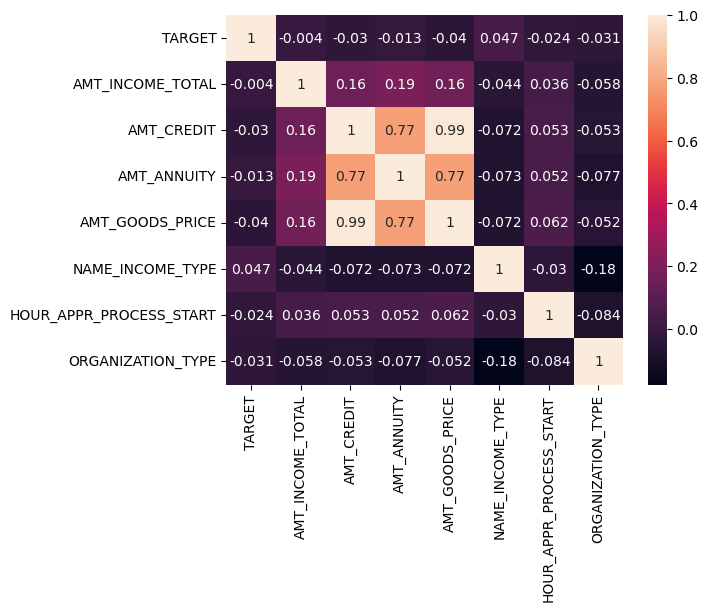

In [29]:
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
df

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,202500.0,406597.5,24700.5,351000.0,7,10,5
1,0,270000.0,1293502.5,35698.5,1129500.0,4,11,39
2,0,67500.0,135000.0,6750.0,135000.0,7,9,11
3,0,135000.0,312682.5,29686.5,297000.0,7,17,5
4,0,121500.0,513000.0,21865.5,513000.0,7,11,37
...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,7,15,43
307507,0,72000.0,269550.0,12001.5,225000.0,3,8,57
307508,0,153000.0,677664.0,29979.0,585000.0,7,9,39
307509,1,171000.0,370107.0,20205.0,319500.0,1,9,3


**Feature Selection**

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

In [31]:
X = df.drop("TARGET",axis=1)
y = df.TARGET

In [32]:
X.shape

(307511, 7)

**Train, Test and Split**

In [33]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape,X_test.shape

((215257, 7), (92254, 7))

In [34]:
X_train

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
208983,202500.0,585000.0,29250.0,585000.0,4,10,11
71687,112500.0,656811.0,30564.0,567000.0,3,11,57
301340,144000.0,450000.0,22500.0,450000.0,1,10,4
216927,450000.0,1483231.5,51687.0,1354500.0,4,18,41
109091,202500.0,454500.0,19255.5,454500.0,1,9,5
...,...,...,...,...,...,...,...
21440,292500.0,2013840.0,53253.0,1800000.0,7,11,55
117583,157500.0,599778.0,32665.5,477000.0,7,6,11
73349,135000.0,270000.0,13500.0,270000.0,1,12,5
267336,135000.0,781920.0,47835.0,675000.0,7,14,40


In [35]:
X_test

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,135000.0,654498.0,31617.0,585000.0,3,9,57
94645,135000.0,234576.0,25393.5,202500.0,7,17,11
306349,112500.0,157914.0,16753.5,139500.0,7,14,33
258314,247500.0,1125000.0,36292.5,1125000.0,7,16,40
87597,202500.0,900000.0,35158.5,900000.0,7,8,42
...,...,...,...,...,...,...,...
98497,81000.0,808650.0,26217.0,675000.0,7,16,40
205542,99000.0,135000.0,10822.5,135000.0,7,14,42
127474,157500.0,675000.0,38880.0,675000.0,7,10,42
46981,112500.0,1006920.0,42790.5,900000.0,3,11,57


**Random forest Classifier**

Random forest is a type of Supervised Machine Learning Algorithm that is commonly used in classification and regression problems. It constructs decision trees from various samples and uses their majority vote for classification and average for regression.

In [36]:
# Applying random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [37]:
y_pred = rf_Classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[83977   810]
 [ 7320   147]]


0.9118737398920372

In [39]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84787
           1       0.15      0.02      0.03      7467

    accuracy                           0.91     92254
   macro avg       0.54      0.51      0.49     92254
weighted avg       0.86      0.91      0.88     92254



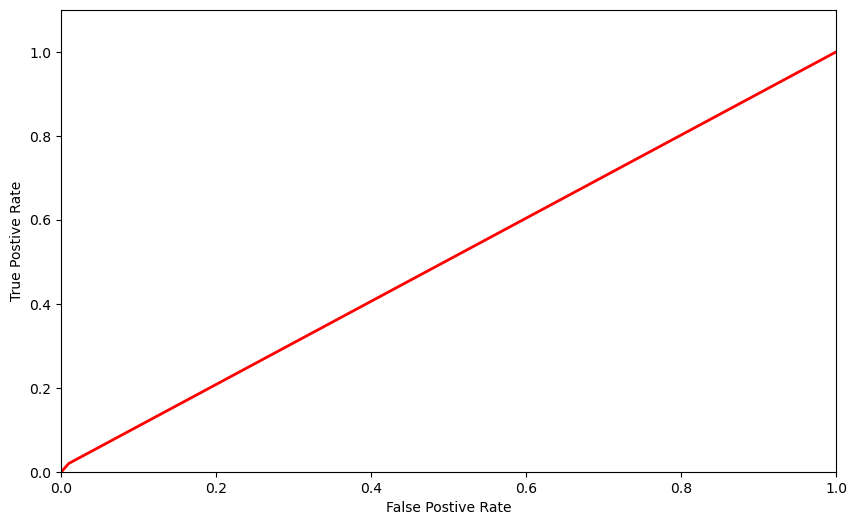

In [40]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_fit = LogisticRegression().fit(X_train,y_train).predict(X_test)

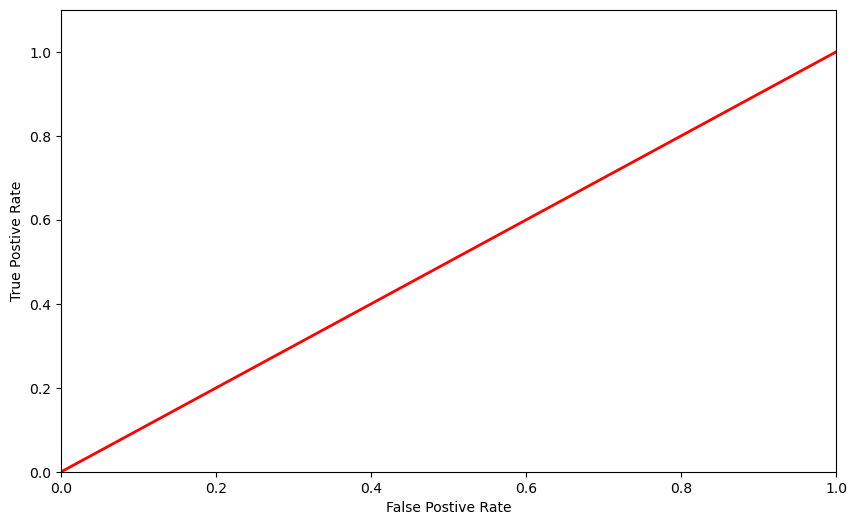

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test,LogisticRegression_fit)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN_fit = KNeighborsClassifier().fit(X_train,y_train).predict(X_test)
DecisionTreeClassifier_fit = DecisionTreeClassifier().fit(X_train,y_train).predict(X_test)

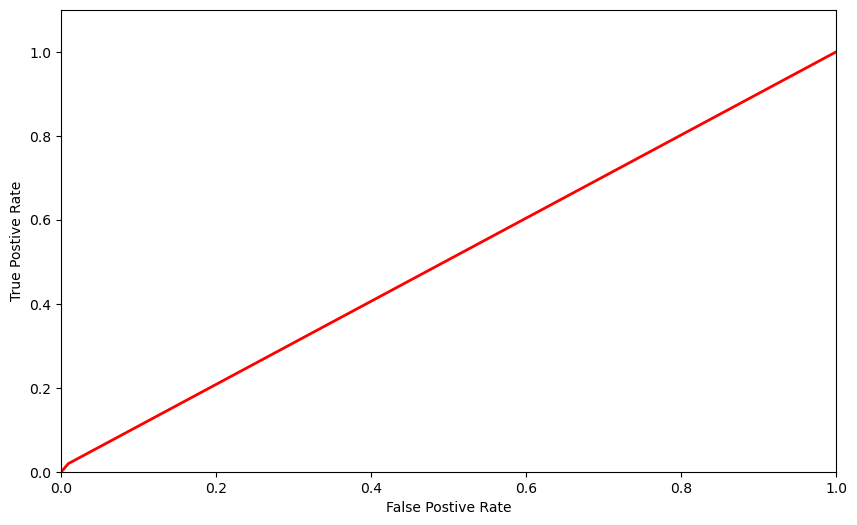

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test,KNN_fit)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

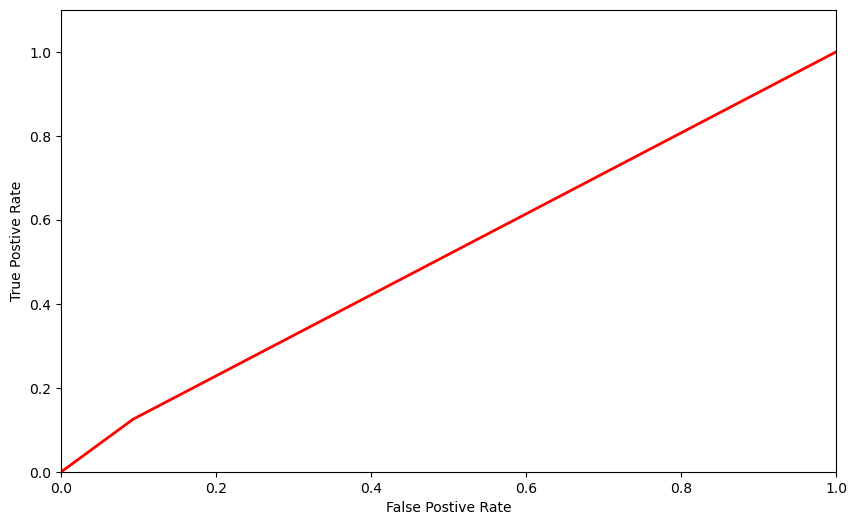

In [45]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test,DecisionTreeClassifier_fit)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

In [46]:
from sklearn.metrics import cohen_kappa_score
# Kappa系数是基于混淆矩阵的计算得到的模型评价参数(越接近 1 越好)
kappa = cohen_kappa_score(np.array(y_test).reshape(-1,1), np.array(y_pred).reshape(-1,1))
print(kappa)

0.01681947889033586


In [47]:
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(np.array(y_test).reshape(-1,1), np.array(y_pred).reshape(-1,1))
kappaByHand = kappa_cal(matrix)

In [48]:
kappaByHand

0.016819478890336477

In [49]:
matrix

array([[83977,   810],
       [ 7320,   147]], dtype=int64)

In [50]:
X_test

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
64282,135000.0,654498.0,31617.0,585000.0,3,9,57
94645,135000.0,234576.0,25393.5,202500.0,7,17,11
306349,112500.0,157914.0,16753.5,139500.0,7,14,33
258314,247500.0,1125000.0,36292.5,1125000.0,7,16,40
87597,202500.0,900000.0,35158.5,900000.0,7,8,42
...,...,...,...,...,...,...,...
98497,81000.0,808650.0,26217.0,675000.0,7,16,40
205542,99000.0,135000.0,10822.5,135000.0,7,14,42
127474,157500.0,675000.0,38880.0,675000.0,7,10,42
46981,112500.0,1006920.0,42790.5,900000.0,3,11,57


In [54]:
def ml_model(X_train,X_test, Y_train, Y_test):
    MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators = 10, random_state = 0)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.fit(X_train, Y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare  
ml_model(X_train,X_test, y_train, y_test)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,LogisticRegression,0.92,0.92,0.00,0.00,0.00
1,KNeighborsClassifier,0.92,0.91,0.16,0.02,0.03
3,RandomForestClassifier,0.98,0.91,0.15,0.02,0.03
2,DecisionTreeClassifier,1.00,0.84,0.11,0.13,0.12


In [55]:
#SMOTE 采样

In [56]:
from collections import Counter
print(Counter(y))


from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)


print(Counter(y_smo))



Counter({0: 282686, 1: 24825})
Counter({1: 282686, 0: 282686})


In [57]:
from sklearn.model_selection import train_test_split 
X_train2,X_test2,y_train2,y_test2=train_test_split(X_smo,y_smo,test_size=0.3,random_state=1)

X_train2.shape,X_test2.shape

((395760, 7), (169612, 7))

In [58]:
# Applying random forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_Classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
rf_Classifier.fit(X_train2, y_train2)

RandomForestClassifier(n_estimators=10, random_state=0)

In [59]:
y_pred2 = rf_Classifier.predict(X_test2)
y_pred2

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [60]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     84819
           1       0.89      0.84      0.86     84793

    accuracy                           0.87    169612
   macro avg       0.87      0.87      0.87    169612
weighted avg       0.87      0.87      0.87    169612



AUC :  0.8651764676590563


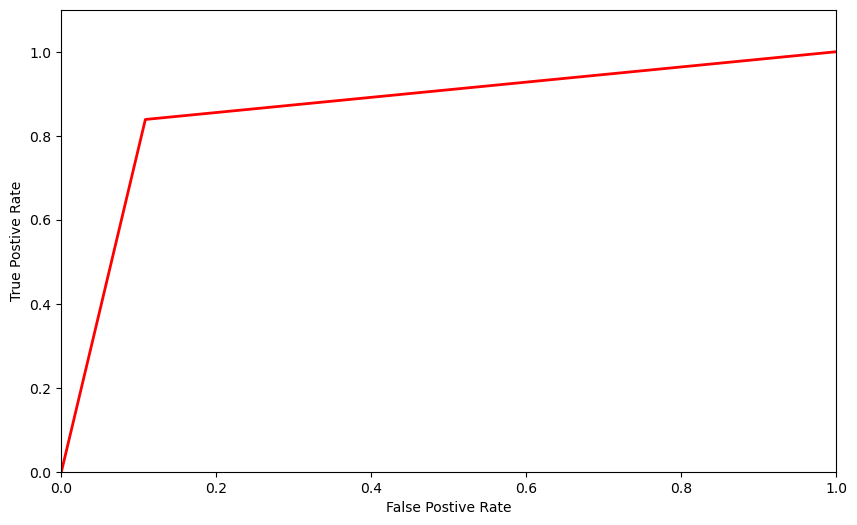

In [61]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test2,y_pred2)
rfauc = auc(fpr, tpr)
print("AUC : ", rfauc)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

AUC :  0.5525777255305682


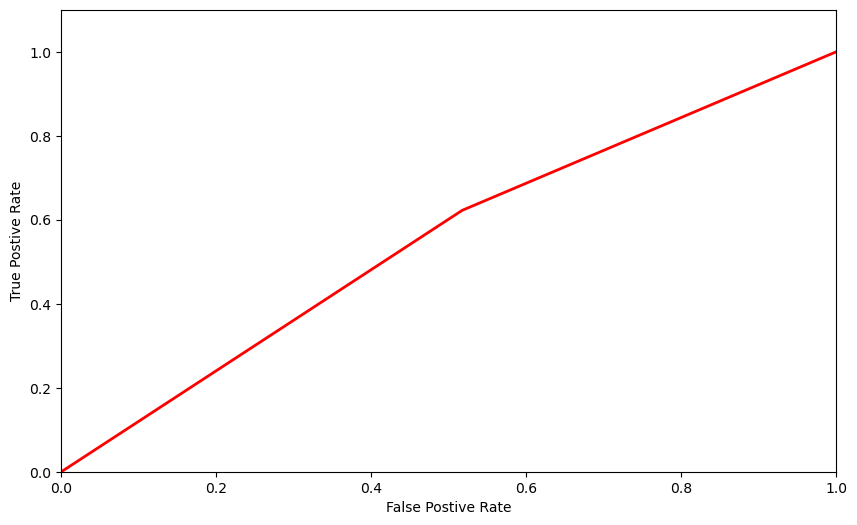

In [62]:
LogisticRegression_fit2 = LogisticRegression().fit(X_train2,y_train2).predict(X_test2)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = \
roc_curve(y_test2,LogisticRegression_fit2)
lgauc = auc(fpr, tpr)
print("AUC : ", lgauc)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

AUC :  0.8018423951644991


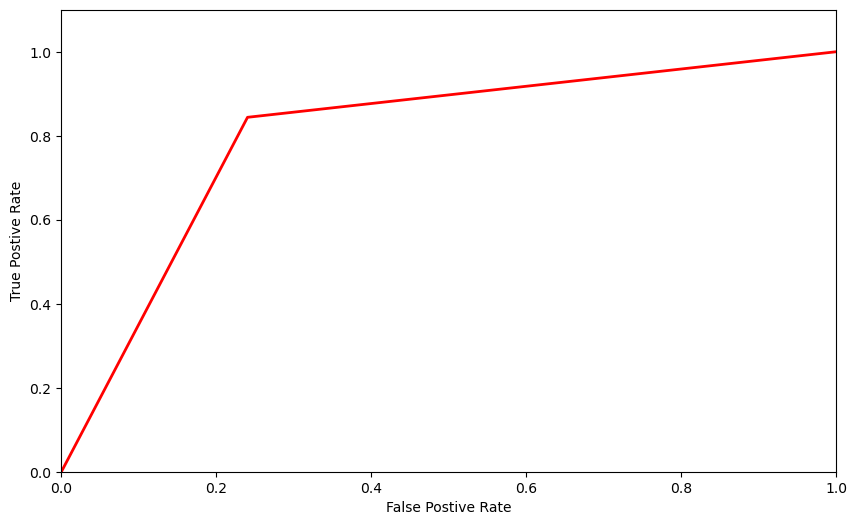

In [63]:
KNN_fit2 = KNeighborsClassifier().fit(X_train2,y_train2).predict(X_test2)
fpr, tpr, thresholds = \
roc_curve(y_test2,KNN_fit2)
knauc = auc(fpr, tpr)
print("AUC : ", knauc)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

AUC :  0.8101813458437985


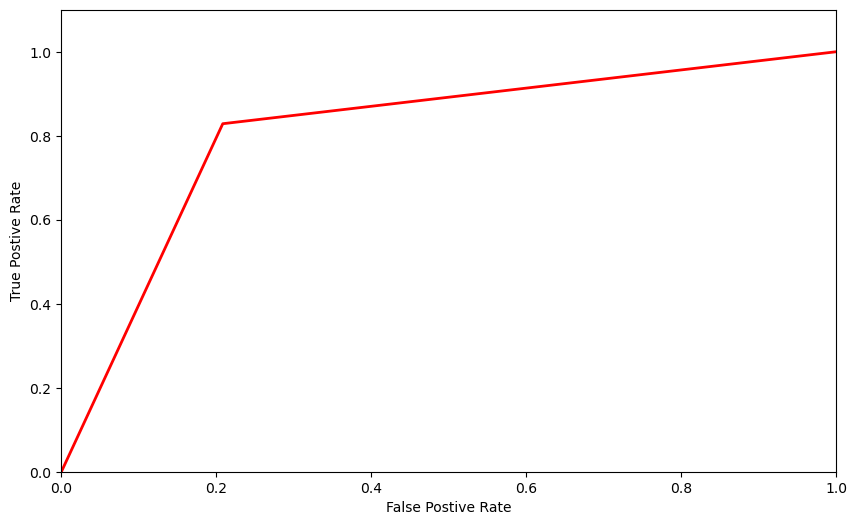

In [64]:
DecisionTreeClassifier_fit2 = DecisionTreeClassifier().fit(X_train2,y_train2).predict(X_test2)
fpr, tpr, thresholds = \
roc_curve(y_test2,DecisionTreeClassifier_fit2)
dtauc = auc(fpr, tpr)
print("AUC : ", dtauc)
plt.figure(figsize=(10,6))
plt.xlim(0,1) 
plt.ylim(0.0,1.1) 
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='red')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score

In [66]:
def ml_model(X_train,X_test, Y_train, Y_test):
    MLA = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators = 10, random_state = 0)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        predicted = alg.fit(X_train, Y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, Y_train), 2)
        MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, Y_test), 2)
        MLA_compare.loc[row_index, 'Precision'] = round(precision_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(Y_test, predicted),2)
        MLA_compare.loc[row_index, 'F1 score'] = round(f1_score(Y_test, predicted),2)
        row_index+=1
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare  
ml_model(X_train2,X_test2, y_train2, y_test2)

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
3,RandomForestClassifier,0.99,0.87,0.89,0.84,0.86
2,DecisionTreeClassifier,0.99,0.81,0.80,0.83,0.81
1,KNeighborsClassifier,0.87,0.80,0.78,0.84,0.81
0,LogisticRegression,0.55,0.55,0.55,0.62,0.58


混淆矩阵

In [67]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cm2=confusion_matrix(y_test2,y_pred2)
print(cm2)
accuracy_score(y_test2,y_pred2)

[[75631  9188]
 [13679 71114]]


0.8651805296795038

In [68]:
cm2=confusion_matrix(y_test2,LogisticRegression_fit2)
print(cm2)
accuracy_score(y_test2,LogisticRegression_fit2)

[[40954 43865]
 [32025 52768]]


0.5525670353512723

In [69]:
cm2=confusion_matrix(y_test2,KNN_fit2)
print(cm2)
accuracy_score(y_test2,KNN_fit2)

[[64448 20371]
 [13240 71553]]


0.8018359550031837

In [70]:
cm2=confusion_matrix(y_test2,DecisionTreeClassifier_fit2)
print(cm2)
accuracy_score(y_test2,DecisionTreeClassifier_fit2)

[[67158 17661]
 [14535 70258]]


0.8101785251043558

In [75]:
print(len(LogisticRegression_fit2),
len(DecisionTreeClassifier_fit2),
      type(LogisticRegression_fit2),
      LogisticRegression_fit2,
len(KNN_fit2))

169612 169612 <class 'numpy.ndarray'> [1 1 1 ... 0 1 1] 169612


In [144]:
myresult=[]
for i in range(len(KNN_fit2)):
    score = 0.5*LogisticRegression_fit2[i] + 0.8*DecisionTreeClassifier_fit2[i] + 0.8*KNN_fit2[i] + 1*y_pred2[i]
    if score>1.59:
        myresult.append(1)
    else:
        myresult.append(0)
        
myresult = np.array(myresult)


In [145]:
print(
myresult,
    len(myresult),
)
cm2=confusion_matrix(y_test2,myresult)
print(cm2)
accuracy_score(y_test2,myresult)

[1 1 1 ... 1 1 0] 169612
[[74500 10319]
 [10764 74029]]


0.8756986533971653

In [147]:
print("precision:",round(precision_score(y_test2, myresult),2))
print("recal:", round(recall_score(y_test2, myresult),2))
print("F1:", round(f1_score(y_test2, myresult),2))

precision: 0.88
recal: 0.87
F1: 0.88


In [140]:
myresult0=[]
for i in range(len(KNN_fit)):
    score = 0.8*LogisticRegression_fit[i] + 0.5*DecisionTreeClassifier_fit[i] + 0.8*KNN_fit[i] + 1*y_pred[i]
    if score>1.59:
        myresult0.append(1)
    else:
        myresult0.append(0)
        
myresult0 = np.array(myresult0)

In [142]:
#imbalance dataset
print(
myresult0,
    len(myresult0),
)
cm=confusion_matrix(y_test,myresult0)
print(cm)
accuracy_score(y_test,myresult0)

[0 0 0 ... 0 0 0] 92254
[[84713    74]
 [ 7448    19]]


0.9184642400329525

In [148]:
print("precision:",round(precision_score(y_test, myresult0),2))
print("recal:", round(recall_score(y_test, myresult0),2))
print("F1:", round(f1_score(y_test, myresult0),2))

precision: 0.2
recal: 0.0
F1: 0.01


In [126]:
from sklearn.metrics import cohen_kappa_score
# Kappa系数是基于混淆矩阵的计算得到的模型评价参数(越接近 1 越好)
kappa2 = cohen_kappa_score(np.array(y_test2).reshape(-1,1), np.array(y_pred2).reshape(-1,1))
print(kappa2)

0.7303588641558286


In [73]:
kappa2 = cohen_kappa_score(np.array(y_test2).reshape(-1,1), np.array(LogisticRegression_fit2).reshape(-1,1))
print(kappa2)

0.10515320063687106


In [74]:
kappa2 = cohen_kappa_score(np.array(y_test2).reshape(-1,1), np.array(KNN_fit2).reshape(-1,1))
print(kappa2)

0.6036770091523269


In [75]:
kappa2 = cohen_kappa_score(np.array(y_test2).reshape(-1,1), np.array(DecisionTreeClassifier_fit2).reshape(-1,1))
print(kappa2)

0.6216325536754177


In [76]:
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

from sklearn.metrics import confusion_matrix
matrix2 = confusion_matrix(np.array(y_test2).reshape(-1,1), np.array(y_pred2).reshape(-1,1))
kappaByHand2 = kappa_cal(matrix2)

In [77]:
matrix2

array([[75631,  9188],
       [13679, 71114]], dtype=int64)

In [78]:
kappaByHand2

0.7303588641558285

In [55]:
LogisticRegression_fit2

NameError: name 'LogisticRegression_fit2' is not defined

In [79]:
result = rf_Classifier.predict(np.array([[192500.0,157914.0,15753.5,139500.0,3,15,33]]))
result


D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [80]:
print(result)

[1]
